In [5]:

from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import random
import pandas as pd
import scipy.spatial.distance as dist

*** Question 1

(-0.5, 134.5, 131.5, -0.5)

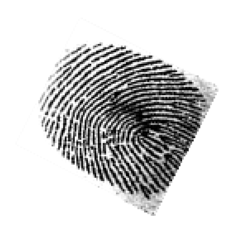

In [27]:
path_one="Ex1_Data/One/"
# creating a image object (main image)
finger2 = Image.open(r"Ex1_Data\One\2.bmp").convert("L")
plt.imshow(finger2,cmap='gray')
plt.axis("off")

(-0.5, 178.5, 181.5, -0.5)

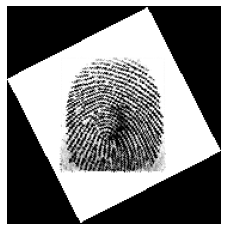

In [28]:

# rotating a image 90 deg counter clockwise
finger2 = finger2.rotate(-63,Image.NEAREST, expand = 1)
plt.imshow(finger2,cmap='gray')
plt.axis("off")

(-0.5, 95.5, 102.5, -0.5)

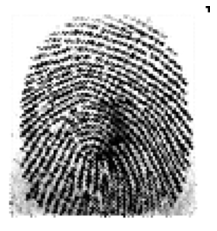

In [29]:
finger2 = finger2.crop((43, 39,139 , 142))
finger2.save(path_one+"2_Fixed.bmp")
plt.imshow(finger2,cmap='gray')
plt.axis("off")

In [30]:
 
# creating a image object (main image)
finger1 = Image.open(r"Ex1_Data\One\1.bmp").convert("L")
# rotating a image 90 deg counter clockwise
finger1 = finger1.rotate(-45,Image.NEAREST, expand = 1)
finger1 = finger1.crop((53,51,149 , 154))
finger1.save(path_one+"1_fixed.bmp")
finger1.show()

In [31]:

def PSNR(original, n):
    path='Ex1_Data/TwentyFingerprints/'+str(n)+".bmp"
    other_fin=Image.open(path).convert("L")
    other_fin=np.array(other_fin)
    mse = np.mean((original - other_fin) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


In [34]:
similar_finger1_psnr=[]
for n in range(1,21):
    similar_finger1_psnr.append(PSNR(np.array(finger1),n))
print("finger ",similar_finger1_psnr.index(max(similar_finger1_psnr))+1,max(similar_finger1_psnr))
similar_finger1_psnr

finger  16 29.734267906218804


[29.5575762485021,
 29.463504482726993,
 29.41021374527306,
 29.34831009760795,
 29.42393959065761,
 29.704615293404846,
 28.36392685059169,
 29.53994553690709,
 29.334351446136367,
 29.41710668230651,
 29.26447057259614,
 29.391067802037696,
 29.404527051858484,
 29.311101729431538,
 29.338560434163973,
 29.734267906218804,
 29.53880954600784,
 29.391185220973377,
 29.413564423519226,
 29.345462489673928]

In [ ]:
similar_finger2_psnr=[]
for n in range(1,21):
    similar_finger2_psnr.append(PSNR(np.array(finger2),n))
print("finger ",similar_finger2_psnr.index(max(similar_finger2_psnr))+1,max(similar_finger2_psnr))
similar_finger2_psnr

In [5]:

similar_finger1=[]
for n in range(1,21):
    path='Ex1_Data/TwentyFingerprints/'+str(n)+".bmp"
    other_fin=Image.open(path)
    other_fin=other_fin.convert("L")
    other_fin=np.array(other_fin)
    similar_finger1.append(ssim(np.array(finger1),other_fin))
print("finger ",similar_finger1.index(max(similar_finger1))+1,max(similar_finger1))
similar_finger1


finger  2 0.06634953468598771


[0.012121851668562694,
 0.06634953468598771,
 0.01348357617772483,
 0.00997071248578423,
 0.010357615861860944,
 0.04445966203652169,
 -0.00031275021598845194,
 0.02582570394150451,
 0.028134529456110006,
 0.004171518851026984,
 0.008390809766261406,
 0.05366488869126469,
 0.013713887816702845,
 0.015049339424688633,
 0.023189332408383924,
 0.06466125665085445,
 0.022240717841968637,
 0.009315160877777852,
 0.04073700848781199,
 0.010965652325279877]

In [6]:

similar_finger2=[]
for n in range(1,21):
    path='Ex1_Data/TwentyFingerprints/'+str(n)+".bmp"
    other_fin=Image.open(path)
    other_fin=other_fin.convert("L")
    other_fin=np.array(other_fin)
    similar_finger2.append(ssim(np.array(finger2),other_fin))
print("finger ",similar_finger2.index(max(similar_finger2))+1,max(similar_finger2))
similar_finger2

finger  16 0.008622006252494794


[-0.004942001646247365,
 0.002946513914874566,
 0.0010613711708913013,
 -0.0036913632333371916,
 -0.0009775810673539058,
 0.008575905760349401,
 -0.006816779480523685,
 0.0032288093366524264,
 -0.007350509651991364,
 0.002814261258601489,
 0.0004716230552895908,
 -0.0006895364433539212,
 -0.005887324684886154,
 0.00130794395648943,
 0.00011179534566247526,
 0.008622006252494794,
 0.0038212820406494192,
 0.0013940822958849607,
 1.5767319001154895e-05,
 0.0027562509459374065]

In [7]:

similar_finger3=[]
finger3=Image.open(r"Ex1_Data\One\3.BMP").convert("L")
finger3=np.array(finger3)
for n in range(1,21):
    path='Ex1_Data/TwentyFingerprints/'+str(n)+".bmp"
    other_fin=Image.open(path)
    other_fin=other_fin.convert("L")
    other_fin=np.array(other_fin)
    similar_finger3.append(ssim(np.array(finger3),other_fin))
print("finger ",similar_finger3.index(max(similar_finger3))+1,max(similar_finger3))
similar_finger3

finger  7 0.04431468369707874


[0.019897765722091995,
 0.0073618506631953915,
 0.005507040058713256,
 0.02919814512630419,
 0.002114210212617569,
 -0.009004360784804181,
 0.04431468369707874,
 -0.00153448038165572,
 -0.015775585799682745,
 0.009973930422881472,
 -0.010484548171306639,
 0.004607742888049991,
 0.0189607829779937,
 0.0075435475023146745,
 0.009627278773571144,
 0.005075218067736922,
 0.027371137223074233,
 0.010593893463170261,
 0.002610674625786957,
 -0.018361038491125446]

** Question 3

In [3]:
def plot_images(*images):
	images = list(images)
	n = len(images)
	fig, ax = plt.subplots(ncols=n, sharey=True)
	for i, img in enumerate(images):
		ax[i].imshow(img, cmap='gray')
		ax[i].axis('off')
		extent = ax[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
		plt.savefig("Ex1_Data/my finger/"+'fig'+str(i)+'.jpg', bbox_inches=extent)
	plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
	plt.show()

(-0.5, 329.5, 516.5, -0.5)

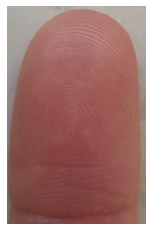

In [37]:
myfinger=cv2.imread("Ex1_Data/my finger/myfinger2.png")
image = cv2.cvtColor(myfinger, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")

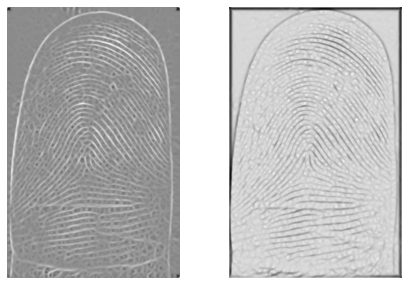

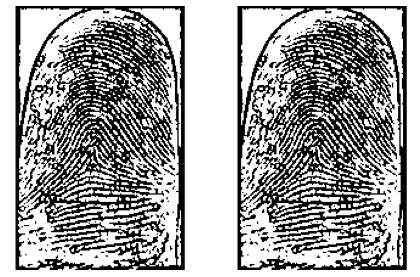

In [38]:
def detect_ridges(gray, sigma=3.0):
	H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
	maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
	return maxima_ridges, minima_ridges


def main():
	# -------------------------- Step 1: import the image whose background has been removed ----------
	img = cv2.imread("Ex1_Data/my finger/myfinger2.png",1)

	# -------------------------- Step 2: Sharpen the image -------------------------------------------
	kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
	sharpened = cv2.filter2D(img, -1, kernel)
	# cv2.imshow("sharpened",sharpened)
	# --------------------------- Step 3: Grayscale the image------------------------------------------
	gray = cv2.cvtColor(sharpened,cv2.COLOR_BGR2GRAY)
	# cv2.imshow("gray",gray)

	# --------------------------- Step 4: Perform histogram equilisation ------------------------------
	hist,bins = np.histogram(gray.flatten(),256,[0,256])
	cdf = hist.cumsum()
	cdf_normalized = cdf * hist.max()/ cdf.max()

	cdf_m = np.ma.masked_equal(cdf,0)
	cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
	cdf = np.ma.filled(cdf_m,0).astype('uint8')

	img2=cdf[gray]
	# ----------------------------- Step 5: Ridge detection filter ------------------------------------
	#sigma = 2.7
	a, b = detect_ridges(img2, sigma=2.7)
	plot_images(a, b)

	# ----------------------------- Step 6: Convert image to binary image -----------------------------
	img = cv2.imread("Ex1_Data/my finger/fig1.jpg",0)
	# cv2.imshow("img",img)
	bg = cv2.dilate(img,np.ones((5,5),dtype=np.uint8))
	bg = cv2.GaussianBlur(bg,(5,5),1)
	# cv2.imshow("bg",bg)
	src_no_bg = 255 - cv2.absdiff(img,bg)
	# cv2.imshow("src_no_bg",src_no_bg)
	ret,thresh = cv2.threshold(src_no_bg,240,255,cv2.THRESH_BINARY)
	#cv2.imshow("threshold",thresh)
	plot_images(thresh, thresh)

main()

In [39]:
# Python program to demonstrate
# image steganography using OpenCV
  
  
import cv2
import numpy as np
import random
  
  
# Encryption function
def encrypt():
      
    # img1 and img2 are the
    # two input images
    img2 = cv2.imread('Ex1_Data/my finger/fig1.jpg')
    # img2 = cv2.resize(img2,(640,640), interpolation = cv2.INTER_AREA)
    img1 = cv2.imread('Ex1_Data/Three_A/Face_gray.jpg')
      
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            for l in range(3):
                  #10000000
                # v1 and v2 are 8-bit pixel values
                # of img1 and img2 respectively
                v1 = format(img1[i][j][l], '08b')
                v2 = format(img2[i][j][l], '08b')
                  
                # Taking 4 MSBs of each image
                v3 = v1[:6] + v2[:2] 
                  
                img1[i][j][l]= int(v3, 2)
                  
    cv2.imwrite('pic3in2.png', img1)
  
      
# Decryption function
def decrypt(path='pic3in2.png'):
      
    # Encrypted image
    img = cv2.imread(path) 
    width = img.shape[0]
    height = img.shape[1]
      
    # img1 and img2 are two blank images
    img1 = np.zeros((width, height, 3), np.uint8)
    img2 = np.zeros((width, height, 3), np.uint8)
      
    for i in range(width):
        for j in range(height):
            for l in range(3):
                v1 = format(img[i][j][l], '08b')
                v2 = v1[:4] + chr(random.randint(0, 1)+48) * 4
                v3 = v1[2:] + chr(random.randint(0, 1)+48) * 4
                  
                # Appending data to img1 and img2
                img1[i][j][l]= int(v2, 2)
                img2[i][j][l]= int(v3, 2)
      
    # These are two images produced from
    # the encrypted image
    cv2.imwrite('pic2_re.png', img1)
    cv2.imwrite('pic3_re.png', img2)
      
      
# Driver's code
encrypt()
decrypt()

(-0.5, 5119.5, 639.5, -0.5)

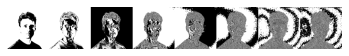

In [48]:

def bitplanes(im):
    im = Image.open(im).convert("L")
    data = np.array(im)
    out = []
    # create an image for each k bit plane
    for k in range(7,-1,-1):
    # extract kth bit (from 0 to 7)
        res = data // 2**k & 1
        out.append(res*255)
    # stack generated images
    b = np.hstack(out)
    return Image.fromarray(b)

bitplane=bitplanes("Ex1_Data/Three_B/Comb_Finger_line.jpg")
plt.imshow(bitplane,cmap="gray")
plt.axis("off")

In [49]:
secret = Image.open("Ex1_Data/Three_B/Comb_Finger_line.jpg")
data_s = np.array(secret)

bit = np.bitwise_and(np.right_shift(data_s, 1), 1)
data_s = bit ^ data_s & 1

new_img = Image.fromarray(data_s * np.uint(255))
new_img.show()

** Question 2

In [1]:

def colorizeBy_colorPalette(image_addr:str, colorPalette_addr:str, output_addr:str = "."):

    grayimg = Image.open(image_addr)
    grayimg_arr = np.array(grayimg)

    colors_data = pd.read_csv(colorPalette_addr)

    R = np.zeros(grayimg_arr.shape)
    G = np.zeros(grayimg_arr.shape)
    B = np.zeros(grayimg_arr.shape)
    for col in range(grayimg_arr.shape[1]):
        for row in range(grayimg_arr.shape[0]):
            R[row, col] = colors_data.iloc[grayimg_arr[row, col], 0]
            G[row, col] = colors_data.iloc[grayimg_arr[row, col], 1]
            B[row, col] = colors_data.iloc[grayimg_arr[row, col], 2]
    out = np.array((R, G, B)).transpose(1, 2, 0)
    new = Image.fromarray(out.astype('uint8'), 'RGB')
    new.save(f'{output_addr}/Image_color.jpg')
    return new


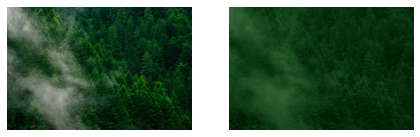

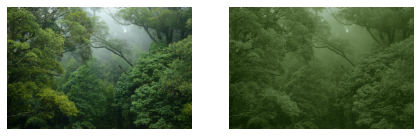

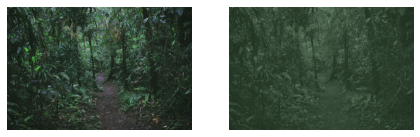

In [6]:
path="D:/dev/python/penhan ax/Ex1_Data/Two_A"
img1=Image.open(r"D:/dev/python/penhan ax/Ex1_Data/Two_A/Forest_1/Forest_1_S.jpg")
img2=Image.open(r"D:/dev/python/penhan ax/Ex1_Data/Two_A/Forest_2/Forest_2_S.jpg")
img3=Image.open(r"D:/dev/python/penhan ax/Ex1_Data/Two_A/Forest_3/Forest_3_S.jpg")
img1_colorize=colorizeBy_colorPalette(path+"/Forest_1/Forest_1_S_gray.jpg",path+"/Forest_1/Forest_1_S_color_palette_sort.csv",path+"/Forest_1")
img2_colorize=colorizeBy_colorPalette(path+"/Forest_2/Forest_2_S_gray.jpg",path+"/Forest_2/Forest_2_S_color_palette_sort.csv",path+"/Forest_2")
img3_colorize=colorizeBy_colorPalette(path+"/Forest_3/Forest_3_S_gray.jpg",path+"/Forest_3/Forest_3_S_color_palette_sort.csv",path+"/Forest_3")
plot_images(img1,img1_colorize)
plot_images(img2,img2_colorize)
plot_images(img3,img3_colorize)


In [14]:
print(dist.euclidean(np.array(img1).reshape(640*427*3),np.array(img1_colorize).reshape(640*427*3)))
print(dist.euclidean(np.array(img2).reshape(640*424*3),np.array(img2_colorize).reshape(640*424*3)))
print(dist.euclidean(np.array(img3).reshape(640*427*3),np.array(img3_colorize).reshape(640*427*3)))

122993.11899858463
139216.54748987276
190520.43102512654


In [53]:
def palette(img):
    arr = np.asarray(img)
    palette, index = np.unique(asvoid(arr).ravel(), return_inverse=True)
    palette = palette.view(arr.dtype).reshape(-1, arr.shape[-1])
    count = np.bincount(index)
    order = np.argsort(count)
    return palette[order[::-1]]
def asvoid(arr):
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))


In [54]:
img = Image.open("Ex1_Data\Two_B\Forest_1_S.jpg", 'r').convert('RGB')
print(palette(img))
img_platted=palette(img)[:256]

image=Image.fromarray(img_platted).save("Ex1_Data\Two_B\Forest_1_palette.png")

df = pd.DataFrame(img_platted, columns = ['R','G','B'])
df.to_csv("Ex1_Data\Two_B\Forest_1_S_color_palette_sort.csv",index=False)

[[ 0 30  0]
 [ 0 31  0]
 [ 0 25  0]
 ...
 [36 59 49]
 [36 60 26]
 [ 0  0  0]]


In [55]:
img = Image.open("Ex1_Data\Two_B\Forest_2_S.jpg", 'r').convert('RGB')
print(palette(img))
img_platted=palette(img)[:256]

image=Image.fromarray(img_platted).save("Ex1_Data\Two_B\Forest_2_palette.png")

df = pd.DataFrame(img_platted, columns = ['R','G','B'])
df.to_csv("Ex1_Data\Two_B\Forest_2_S_color_palette_sort.csv",index=False)

[[  3  12   9]
 [ 12  24  14]
 [ 11  23  13]
 ...
 [ 50  79  57]
 [103 118  85]
 [ 81  96  11]]


In [56]:
img = Image.open("Ex1_Data\Two_B\Forest_3_S.jpg", 'r').convert('RGB')
print(palette(img))
img_platted=palette(img)[:256]

image=Image.fromarray(img_platted).save("Ex1_Data\Two_B\Forest_3_palette.png")

df = pd.DataFrame(img_platted, columns = ['R','G','B'])
df.to_csv("Ex1_Data\Two_B\Forest_3_S_color_palette_sort.csv",index=False)

[[ 25  35  26]
 [ 24  34  25]
 [ 26  36  27]
 ...
 [ 88 137 107]
 [ 88 138 101]
 [  0  11   6]]


In [58]:
path="D:/dev/python/penhan ax/Ex1_Data/Two_B/"
img1=Image.open(r"D:/dev/python/penhan ax/Ex1_Data/Two_B/Forest_1_S.jpg")
img2=Image.open(r"D:/dev/python/penhan ax/Ex1_Data/Two_B/Forest_2_S.jpg")
img3=Image.open(r"D:/dev/python/penhan ax/Ex1_Data/Two_B/Forest_3_S.jpg")
#img1_colorize=colorizeBy_colorPalette(path+"Forest_1_S.jpg",path+"Forest_1_S_color_palette_sort.csv",path+"/Forest_1")
img2_colorize=colorizeBy_colorPalette(path+"Forest_2_S.jpg",path+"Forest_2_S_color_palette_sort.csv",path+"/Forest_2")
img3_colorize=colorizeBy_colorPalette(path+"Forest_3_S.jpg",path+"Forest_3_S_color_palette_sort.csv",path+"/Forest_3")
#plot_images(img1,img1_colorize)
plot_images(img2,img2_colorize)
plot_images(img3,img3_colorize)


ValueError: axes don't match array